In [15]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

In [16]:
data = pd.read_csv('../data/data.csv', parse_dates=['date'])

data['train'] = data['num'] + '-' + data['class']

data.head(2)

,date,days,places,price,num,class,weekday,day_name,weekend,train
0,2021-04-06,1,0.623188,3161.0,001А,Купе,1,Tuesday,0,001А-Купе
1,2021-04-07,1,0.695652,3275.0,001А,Купе,2,Wednesday,0,001А-Купе


In [17]:
grouped = data.groupby(['train', 'days'])['price'].mean().reset_index()\
    .pivot(index='train', columns='days', values='price')

grouped.head(2)

days,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
train,,,,,,,,,,,,,,,
001А-Купе,2885.12500,2944.900000,2861.78125,2879.454545,2787.90625,2725.53125,2696.181818,2667.424242,2642.727273,2606.705882,2587.666667,2595.000000,2575.029412,2589.787879,2608.548387
001А-СВ,6219.62069,6117.451613,5996.59375,6036.121212,5857.12500,6011.93750,6005.848485,6106.151515,6106.151515,6228.147059,6205.696970,6263.764706,6355.000000,6426.393939,6448.419355


In [18]:
grouped.shape

(144, 15)

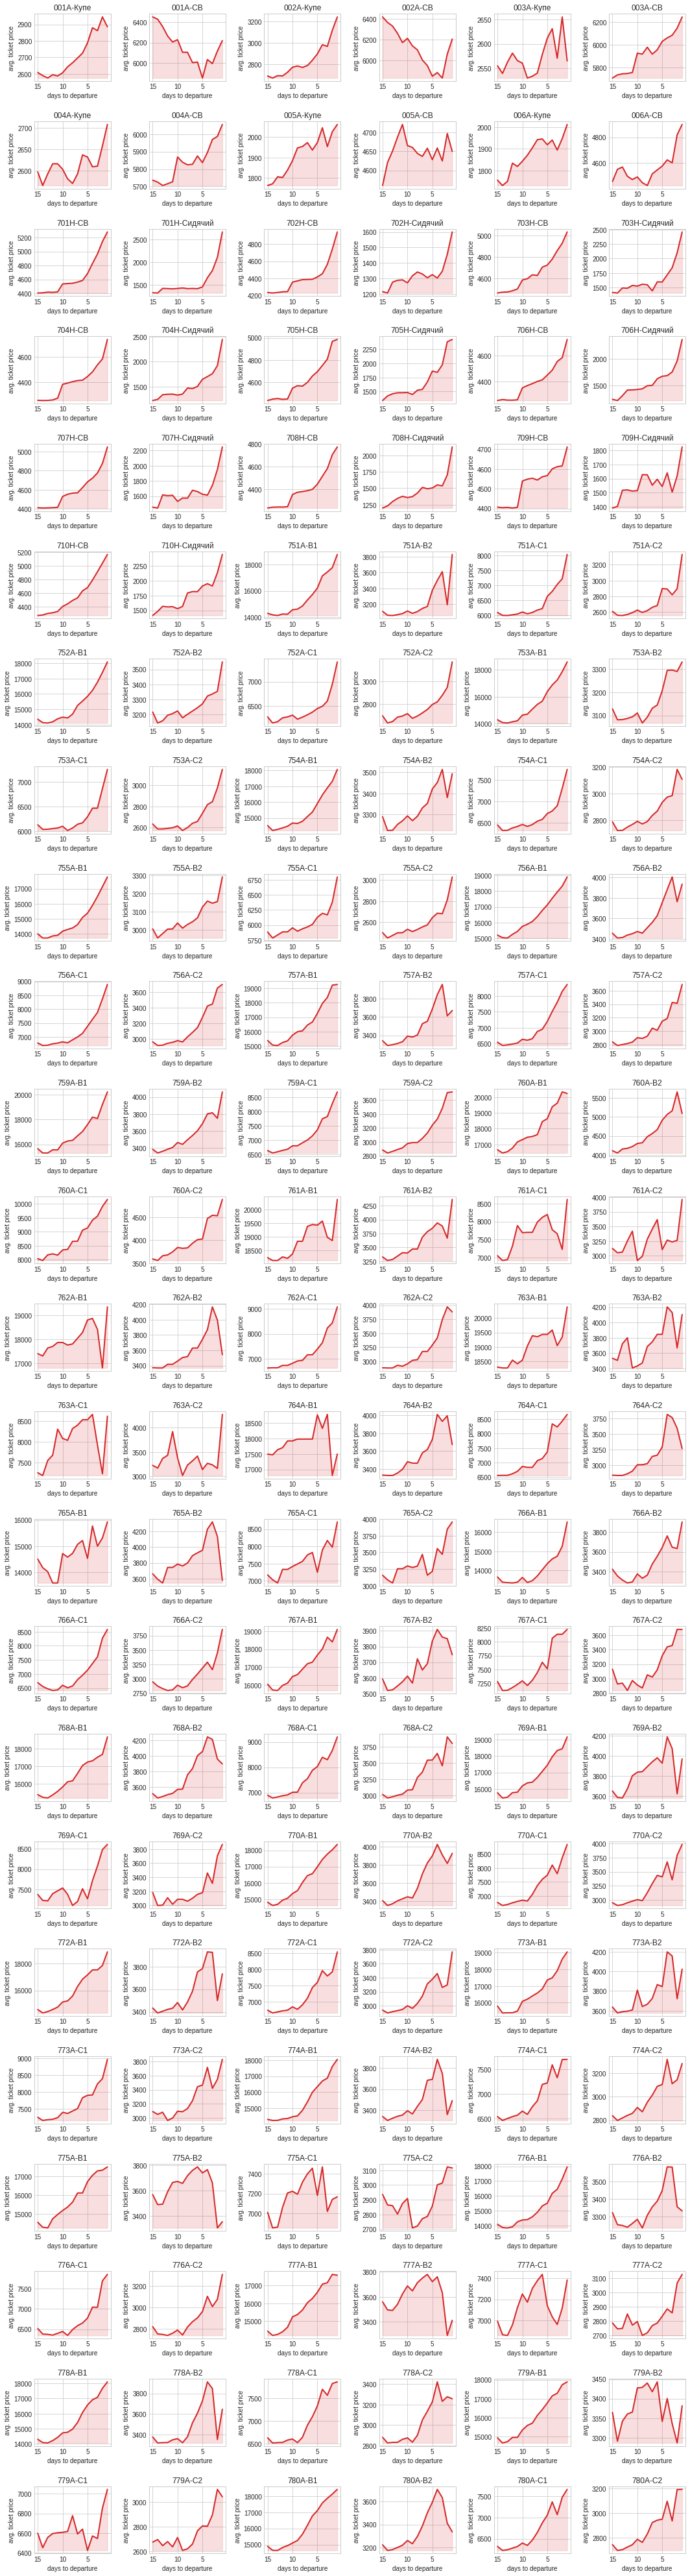

In [28]:
trains = grouped.index.tolist()

ncols = 6
nrows = len(trains) // ncols + (len(trains) % ncols > 0)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows)
fig.set_size_inches(3 * ncols, 3 * nrows)
fig.subplots_adjust(wspace=0.5, hspace=0.6)
axes = axes.flatten()

for train, ax in zip(trains, axes):
    row = grouped.loc[train]
    ax.plot(row, c='C3', lw=2)
    ax.fill_between(row.index, row.values, row.min(), color='C3', alpha=0.15)
    
    ax.set_title(train)
    ax.set_xlabel('days to departure')
    ax.set_ylabel('avg. ticket price')
    ax.invert_xaxis()
    
for i in range(len(trains), len(axes)):
    axes[i].axis('off')
    
plt.savefig('../data/figures/price_vs_days.pdf', transparent=True, bbox_inches='tight')